In [1]:
!pip install -q openprompt==0.1.1 \
'torch>=1.9.0' \
'transformers>=4.10.0' \
sentencepiece==0.1.96 \
'scikit-learn>=0.24.2' \
'tqdm>=4.62.2' \
tensorboardX \
nltk \
yacs \
dill \
datasets \
rouge==1.0.0 \
scipy==1.4.1 \
fugashi \
ipadic \
unidic-lite

In [1]:
# !pip install -q matplotlib
!pip install -q plotly

In [108]:
import openprompt.plms as plms
from openprompt.plms.mlm import MLMTokenizerWrapper
from transformers import BertConfig, BertForMaskedLM, BertTokenizer
from openprompt.data_utils import InputExample
from transformers import AutoTokenizer, AutoModel
from openprompt.plms import load_plm
from openprompt.prompts import ManualTemplate
from openprompt.prompts import PtuningTemplate
from openprompt.prompts import ManualVerbalizer
from openprompt import PromptForClassification
from openprompt import PromptDataLoader
import torch



In [109]:
import xml.etree.ElementTree as ET
tree = ET.parse('./smokers_surrogate_train_all_version2.xml')
root = tree.getroot()

In [110]:
root.attrib
root.tag
counter=0
for child in root:
    if counter == 10:
        break
    print(child.tag, child.attrib)
    counter +=1
    

RECORD {'ID': '641'}
RECORD {'ID': '643'}
RECORD {'ID': '681'}
RECORD {'ID': '704'}
RECORD {'ID': '757'}
RECORD {'ID': '786'}
RECORD {'ID': '872'}
RECORD {'ID': '874'}
RECORD {'ID': '535'}
RECORD {'ID': '540'}


In [111]:
[elem.tag for elem in root.iter()]

counter=0
for elem in root.iter():
    if counter==10:
        break
    print(elem.tag)
    counter+=1

ROOT
RECORD
SMOKING
TEXT
RECORD
SMOKING
TEXT
RECORD
SMOKING
TEXT


In [112]:
counter=0
for smoking in root.iter('SMOKING'):
    if counter==10:
        break
    print(smoking.attrib.get('STATUS'))
    counter +=1
    
# for movie in root.iter('SMOKING'):
#     print(movie.attrib)

CURRENT SMOKER
CURRENT SMOKER
CURRENT SMOKER
CURRENT SMOKER
CURRENT SMOKER
CURRENT SMOKER
CURRENT SMOKER
CURRENT SMOKER
CURRENT SMOKER
CURRENT SMOKER


In [113]:
# for text in root.iter('TEXT'):
#     print(text.text)
    
counter=0
for text in root.iter('TEXT'):
    if counter==1:
        break
    print(text.text)
    counter +=1    


977146916
HLGMC
2878891
022690
01/27/1997 12:00:00 AM
CARCINOMA OF THE COLON .
Unsigned
DIS
Report Status :
Unsigned
Please do not go above this box important format codes are contained .
DISCHARGE SUMMARY
ARF32 FA
DISCHARGE SUMMARY NAME :
GIRRESNET , DIEDREO A
UNIT NUMBER :
075-71-01
ADMISSION DATE :
01/27/1997
DISCHARGE DATE :
01/31/1997
PRINCIPAL DIAGNOSIS :
Carcinoma of the colon .
ASSOCIATED DIAGNOSIS :
Urinary tract infection , and cirrhosis of the liver .
HISTORY OF PRESENT ILLNESS :
The patient is an 80-year-old male , who had a history of colon cancer in the past , resected approximately ten years prior to admission , history of heavy alcohol use , who presented with a two week history of poor PO intake , weight loss , and was noted to have acute on chronic Hepatitis by chemistries and question of pyelonephritis .
He lived alone but was driven to the hospital by his son because of reported worsening and general care and deconditioning .
Emergency Department course ; he was ev

In [114]:
counter=0
for text in root.findall("./SMOKING/[@STATUS='CURRENT SMOKER']"):
    if counter==10:
        break
    print(text.attrib)
    print(counter)
    counter +=1    

In [115]:
# doc=xee.fromstring('./smokers_surrogate_train_all_version2.xml')

for tag in root.findall('SMOKING'):
    if tag.attrib['STATUS']!='CURRENT SMOKER':
#         root.remove(tag)
        print(tag)
        
# print(ET.tostring(root))

In [116]:
# node=root
# if node.tag == "SMOKING":
#         status = node.attrib.get("STATUS")
#         print(status)
#         if status is not None:
#             print(node.attrib.get("TEXT"))
import xml.etree.ElementTree as ET
tree = ET.parse('./smokers_surrogate_train_all_version2.xml')
root = tree.getroot()

text_list=[]
counter =0             
for record in root.iter('RECORD'):
    if counter == 2:
        break
    print(record.attrib.get('ID'))
    smoking = record.find('SMOKING')
    print(smoking.attrib.get('STATUS'))
    if smoking.attrib.get('STATUS')=="CURRENT SMOKER":
        text=record.find('TEXT')
        text_list.append(text)
        print(counter)
    counter +=1

641
CURRENT SMOKER
0
643
CURRENT SMOKER
1


In [117]:
import xml.etree.ElementTree as ET
tree = ET.parse('./smokers_surrogate_train_all_version2.xml')
root = tree.getroot()

text_list=[]
label_list=[]
counter =0             
for record in root.iter('RECORD'):
#     if counter:
#         break
#     print(record.attrib.get('ID'))
    smoking = record.find('SMOKING')
    label_list.append(smoking.attrib.get('STATUS'))
#     print(smoking.attrib.get('STATUS'))
    text=record.find('TEXT')
    text_list.append(text.text)
#     print(text_list.__len__())
#     print(counter)
    counter +=1

In [118]:
print(text_list.__len__())
print(label_list.__len__())

398
398


In [119]:
text_list.__class__
label_list.__class__

list

In [120]:
text_list[1]

'\n026738007\nCMC\n15319689\n3/25/1998 12:00:00 AM\nMEDIASTINAL ADENOPATHY RT. LUNG MASS\nSigned\nDIS\nAdmission Date :\n03/25/1998\nReport Status :\nSigned\nDischarge Date :\n04/08/1998\nPRINCIPAL DIAGNOSIS :\nRight lung choriocarcinoma .\nOTHER DIAGNOSIS :\nPericardial effusion .\nHISTORY OF PRESENT ILLNESS :\nThe patient was in her usual state of health , carrying the diagnosis of right lung chorio carcinoma , when she began to develop dyspnea and on 03/24/98 an echocardiogram revealed a pericardial effusion and possible tamponade clinically .\nThe patient was first diagnosed in 10/97 , when she presented with the symptoms of menorrhagia .\nShe had elevated beta HCG levels , no tubal pregnancy was suspected .\nAright oophorectomy was performed .\nIn 11/97 , chest x-ray revealed an abnormality in the right upper lobe .\nA lung biopsy was performed , revealing chorio carcinoma pathologically .\nAt the time , she also had symptoms of hemoptysis .\nOn November 26 , a chest CT revealed m

# Datset

In [185]:
import torch
from torch.utils.data.dataset import Dataset
import pandas as pd
from torch.utils.data import Dataset, DataLoader
 
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
print(device)
 
 
class CustomTextDataset(Dataset):
    def __init__(self, text, labels):
        self.labels = labels
        self.text = text
        
    def __len__(self):
            return len(self.labels)
        
    def __getitem__(self, idx):
            label = self.labels[idx]
            text = self.text[idx]
            sample = {"Text": text, "Class": label}
            return sample

cuda:0


In [186]:
import pandas as pd

# text = ['Happy', 'Amazing', 'Sad', 'Unhapy', 'Glum']
# labels = ['Positive', 'Positive', 'Negative', 'Negative', 'Negative']

text_labels_df = pd.DataFrame({'Text': text_list, 'Labels': label_list})

TD = CustomTextDataset(text_labels_df['Text'],
                       text_labels_df['Labels'])

In [187]:
text_labels_df.head()

,Text,Labels
0,\n977146916\nHLGMC\n2878891\n022690\n01/27/199...,CURRENT SMOKER
1,\n026738007\nCMC\n15319689\n3/25/1998 12:00:00...,CURRENT SMOKER
2,\n071962960\nBH\n4236518\n417454\n12/10/2001 1...,CURRENT SMOKER
3,\n418520250\nNVH\n61562872\n3/11/1995 12:00:00...,CURRENT SMOKER
4,\n301443520\nCTMC\n49020928\n448922\n1/11/1990...,CURRENT SMOKER


In [188]:
# Display text and label.
print('\nFirst iteration of data set: ', next(iter(TD)), '\n')
# Print how many items are in the data set
print('Length of data set: ', len(TD), '\n')
# Print entire data set
# print('Entire data set: ', list(DataLoader(TD)), '\n')


First iteration of data set:  {'Text': "\n977146916\nHLGMC\n2878891\n022690\n01/27/1997 12:00:00 AM\nCARCINOMA OF THE COLON .\nUnsigned\nDIS\nReport Status :\nUnsigned\nPlease do not go above this box important format codes are contained .\nDISCHARGE SUMMARY\nARF32 FA\nDISCHARGE SUMMARY NAME :\nGIRRESNET , DIEDREO A\nUNIT NUMBER :\n075-71-01\nADMISSION DATE :\n01/27/1997\nDISCHARGE DATE :\n01/31/1997\nPRINCIPAL DIAGNOSIS :\nCarcinoma of the colon .\nASSOCIATED DIAGNOSIS :\nUrinary tract infection , and cirrhosis of the liver .\nHISTORY OF PRESENT ILLNESS :\nThe patient is an 80-year-old male , who had a history of colon cancer in the past , resected approximately ten years prior to admission , history of heavy alcohol use , who presented with a two week history of poor PO intake , weight loss , and was noted to have acute on chronic Hepatitis by chemistries and question of pyelonephritis .\nHe lived alone but was driven to the hospital by his son because of reported worsening and gene

# Dataset pre-processing

In [189]:
text_labels_df=text_labels_df[~text_labels_df.Labels.str.contains("UNKNOWN")]

In [190]:
text_labels_df_nonsmoker =text_labels_df[text_labels_df.Labels.str.contains("NON-SMOKER")]
text_labels_df_nonsmoker.head()

,Text,Labels
17,\n139964603\nNVH\n40876531\n11/17/2003 12:00:0...,NON-SMOKER
18,\n910458031\nNVH\n23238893\n1/12/1991 12:00:00...,NON-SMOKER
19,\n991509188\nCTMC\n51356028\n369929\n09/05/199...,NON-SMOKER
20,\n320422564\nCTMC\n09300549\n340424\n06/16/199...,NON-SMOKER
21,\n988183518\nPUOMC\n7961198\n290757\n137082\n1...,NON-SMOKER


In [191]:
text_labels_df_smoker =text_labels_df[~text_labels_df.Labels.str.contains("NON-SMOKER")]
text_labels_df_smoker.Labels = "SMOKER"
text_labels_df_smoker.head()

/ihome/yanshanwang/sos86/.local/lib/python3.8/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Text,Labels
0,\n977146916\nHLGMC\n2878891\n022690\n01/27/199...,SMOKER
1,\n026738007\nCMC\n15319689\n3/25/1998 12:00:00...,SMOKER
2,\n071962960\nBH\n4236518\n417454\n12/10/2001 1...,SMOKER
3,\n418520250\nNVH\n61562872\n3/11/1995 12:00:00...,SMOKER
4,\n301443520\nCTMC\n49020928\n448922\n1/11/1990...,SMOKER


In [192]:
text_labels_df_smoker.Labels.value_counts()

SMOKER    80
Name: Labels, dtype: int64

In [193]:
df = text_labels_df_smoker.append(text_labels_df_nonsmoker, ignore_index=True)

In [194]:
df.Labels.value_counts()

SMOKER        80
NON-SMOKER    66
Name: Labels, dtype: int64

In [195]:
x_test=df.Text.to_list()
y_test=df.Labels.to_list()
x_test[1].__class__

str

# TEXT Cleaning

In [196]:
data=df
# remove NULL Values from data
data = data[pd.notnull(data['Text'])]

<AxesSubplot:ylabel='Frequency'>

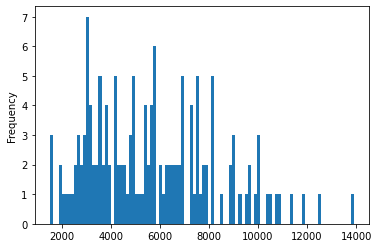

In [197]:
import matplotlib.pyplot as plt
data['len'] = data['Text'].apply(lambda s : len(s))
data['len'].plot.hist(bins=100)

In [198]:
data.len.quantile(0.9)

9392.0

In [199]:
count_df = data[['Labels','Text']].groupby('Labels').aggregate({'Text':'count'}).reset_index().sort_values('Text',ascending=False)
count_df.head()

,Labels,Text
1,SMOKER,80
0,NON-SMOKER,66


In [200]:
target_conditions = count_df[count_df['Text']>3000]['Labels'].values

In [201]:
# BUGGGGGGGGGGGGGGGGG
#def condition_parser(x):
#     if x in target_conditions:
#         return x
#     else:
#         return "OTHER"
    
# data['Labels'] = data['Labels'].apply(lambda x: condition_parser(x)) 
# data = data[data['Labels']!='OTHER']

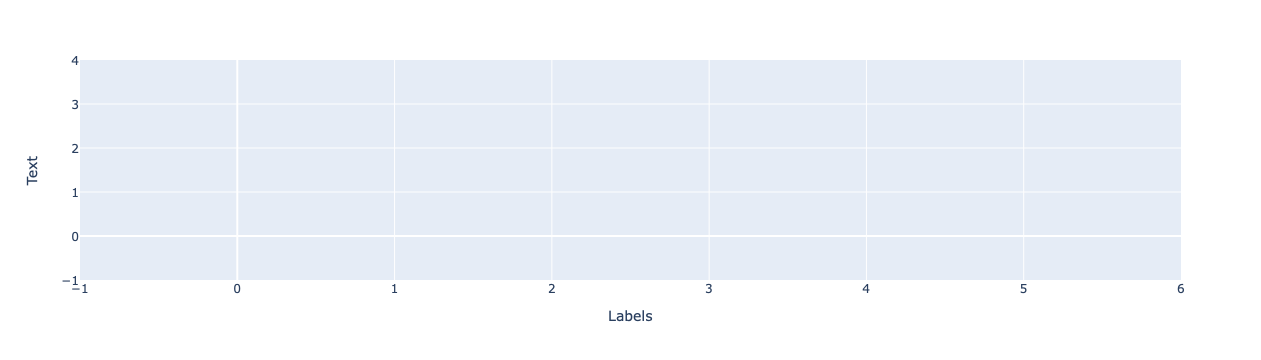

In [202]:
import plotly.express as px
px.bar(count_df[count_df['Text']>3000],x='Labels',y='Text')

In [203]:
import re

def clean_text(x):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', x)
    return x

def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

In [204]:

contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re
contractions, contractions_re = _get_contractions(contraction_dict)
def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)
# Usage
replace_contractions("this's a text with contraction")

'this is a text with contraction'

In [205]:
# lower the text
data["Text"] = data["Text"].apply(lambda x: x.lower())

# Clean the text
data["Text"] = data["Text"].apply(lambda x: clean_text(x))

# Clean numbers
data["Text"] = data["Text"].apply(lambda x: clean_numbers(x))

# Clean Contractions
data["Text"] = data["Text"].apply(lambda x: replace_contractions(x))

In [206]:
data.head()

,Text,Labels,len
0,\n#####\nhlgmc\n#####\n#####\n##/##/#### ##:##...,SMOKER,3855
1,\n#####\ncmc\n#####\n3/##/#### ##:##:## am\nme...,SMOKER,4985
2,\n#####\nbh\n#####\n#####\n##/##/#### ##:##:##...,SMOKER,7926
3,\n#####\nnvh\n#####\n3/##/#### ##:##:## am\ndi...,SMOKER,8872
4,\n#####\nctmc\n#####\n#####\n1/##/#### ##:##:#...,SMOKER,3087


In [207]:
data['Labels'].unique()
data.shape

(146, 3)

In [208]:
data_nonsmoker=data[data['Labels']=="SMOKER"]
data_nonsmoker.head()

,Text,Labels,len
0,\n#####\nhlgmc\n#####\n#####\n##/##/#### ##:##...,SMOKER,3855
1,\n#####\ncmc\n#####\n3/##/#### ##:##:## am\nme...,SMOKER,4985
2,\n#####\nbh\n#####\n#####\n##/##/#### ##:##:##...,SMOKER,7926
3,\n#####\nnvh\n#####\n3/##/#### ##:##:## am\ndi...,SMOKER,8872
4,\n#####\nctmc\n#####\n#####\n1/##/#### ##:##:#...,SMOKER,3087


In [209]:
# import nltk
# nltk.download('punkt')
# # text = "I do not like green eggs and ham. I do like them Sam-I-am."
# text=data_nonsmoker.Text.to_list()
# print(text.__len__())
# a_list = nltk.tokenize.sent_tokenize(text[5])

# print(a_list)

In [210]:
x_test=data.Text.to_list()
y_test=data.Labels.to_list()
x_test[1].__class__

str

In [211]:
# test_occurrences = collections.Counter(y_test)
# test_occurrences=dict(test_occurrences)
# print(test_occurrences)

# BERT
OpenPrompt

In [212]:
import openprompt.plms as plms
from openprompt.plms.mlm import MLMTokenizerWrapper
from transformers import BertConfig, BertForMaskedLM, BertTokenizer

In [213]:
plms._MODEL_CLASSES['bert'] = plms.ModelClass(**{
    'config': BertConfig,
    'tokenizer': BertTokenizer,
    'model':BertForMaskedLM,
    'wrapper': MLMTokenizerWrapper,
})

In [214]:
plms._MODEL_CLASSES

{'bert': ModelClass(config=<class 'transformers.models.bert.configuration_bert.BertConfig'>, tokenizer=<class 'transformers.models.bert.tokenization_bert.BertTokenizer'>, model=<class 'transformers.models.bert.modeling_bert.BertForMaskedLM'>, wrapper=<class 'openprompt.plms.mlm.MLMTokenizerWrapper'>),
 'roberta': ModelClass(config=<class 'transformers.models.roberta.configuration_roberta.RobertaConfig'>, tokenizer=<class 'transformers.models.roberta.tokenization_roberta.RobertaTokenizer'>, model=<class 'transformers.models.roberta.modeling_roberta.RobertaForMaskedLM'>, wrapper=<class 'openprompt.plms.mlm.MLMTokenizerWrapper'>),
 'albert': ModelClass(config=<class 'transformers.models.albert.configuration_albert.AlbertConfig'>, tokenizer=<class 'transformers.models.albert.tokenization_albert.AlbertTokenizer'>, model=<class 'transformers.models.albert.modeling_albert.AlbertForMaskedLM'>, wrapper=<class 'openprompt.plms.mlm.MLMTokenizerWrapper'>),
 'gpt': ModelClass(config=<class 'transfo

# PROMPT Function


In [215]:

def prompt_classification(text):
    classes = [ 
        "SMOKER",
        "NON-SMOKER",
    ]
#     print(text)

    dataset = [ 
          InputExample(
    #         guid = 0,
            text_a =text
#               "Asthma affects lungs  and can be hard to diagnose. The signs of asthma can seem like the signs of COPD, pneumonia, bronchitis, pulmonary embolism, anxiety, and heart disease.", #lung
        ),
    #     InputExample(
    #         guid = 1,
    #         text_a = "COVID-19 is caused by a coronavirus called SARS-CoV-2", #virus
    #     ),
    #     InputExample(
    #         guid = 2,
    #         text_a = "When your brain is damaged, it can affect many different things, including your memory, your sensation, and even your personality. Brain disorders include any conditions or disabilities that affect your brain.", #brain
    #     ),
    #     InputExample(
    #         guid = 3,
    #         text_a = "Symptoms may appear 2-14 days after exposure to the virus", #virus
    #     ),
#             InputExample(
#     #         guid = 4,
#             text_a = """Neurodegenerative diseases cause your brain and nerves to deteriorate over time. They can change your personality and cause confusion. They can also destroy your brain’s tissue and nerves.

#     Some brain diseases, such as Alzheimer’s disease, may develop as you age. """, #brain
#         ),
    ]


#     plm, tokenizer, model_config, WrapperClass = load_plm_fn()


    # template_text = '{"placeholder":"text_a"}: This effects {"mask"}'
    template_text= 'A {"mask"} disorder :  {"placeholder": "text_a"}'

    promptTemplate = ManualTemplate(
        text = template_text,
        tokenizer = tokenizer,
    )

    promptVerbalizer = ManualVerbalizer(
        classes = classes,
        label_words = {
            "SMOKER": ["cigar smoker", "tobacco user", "pipe smoker", "chain-smoker"],
            "NON-SMOKER": ["person who does not smoke tobacco", "non-smoker"
                           "nonsmoker", "ex-smoker", "never-smoker"] #"healthy", 
        },
        tokenizer = tokenizer,
    )

    promptModel = PromptForClassification(
        template = promptTemplate,
        plm = plm,
        verbalizer = promptVerbalizer
    )


    data_loader = PromptDataLoader(
        dataset = dataset,
        tokenizer = tokenizer, 
        template = promptTemplate, 
        tokenizer_wrapper_class=WrapperClass,
        max_seq_length=256, decoder_max_length=3, 
        batch_size=1,shuffle=False, teacher_forcing=False, predict_eos_token=False,
        truncate_method="head"
    )

    promptModel.eval()
    with torch.no_grad():
        for batch in data_loader:
            logits = promptModel(batch)
    #         print(logits)
            preds = torch.argmax(logits, dim = -1)
#             print(classes[preds])
            
    return classes[preds]




In [216]:
# import collections
# import nltk
# nltk.download('punkt')

# def prompt_classification_weighted(text):

#     #convert to list
#     # text = "I do not like green eggs and ham. I do like them Sam-I-am."
#     a_list = nltk.tokenize.sent_tokenize(text)
# #     print(a_list)
# #     print(a_list.__len__())
#     y_pred=[]
#     for x  in a_list:
#         pred_label=prompt_classification(x)
#     #     print(pred_label)
#         y_pred.append(pred_label)
    
# #     print(y_pred.__len__())
    
#     # Weighted prediction
#     weight=0.1
#     occurrences = collections.Counter(y_pred)
#     occurrences=dict(occurrences)
# #     print(occurrences)
#     ## CHANGE CMOKER TO CLASS 1
#     if occurrences.get("SMOKER", 0) > (weight*occurrences["NON-SMOKER"]):
#         print("SMOKER")
#         return "SMOKER"
#     else:
#         print("NON-SMOKER")
#         return "NON-SMOKER"


In [217]:
#if __name__ == "__main__":
    
#     st.title("HealthPrompt: Classifying clinical texts")
#     st.write("Upload Clinical text, Classify it..")

#     @st.cache(allow_output_mutation=True)
def load_plm_fn():
#         plm, tokenizer, model_config, WrapperClass = load_plm("bert", "bert-base-uncased")
         plm, tokenizer, model_config, WrapperClass = load_plm("bert", "emilyalsentzer/Bio_ClinicalBERT")
#        plm, tokenizer, model_config, WrapperClass = load_plm("bert", "dmis-lab/biobert-v1.1")
#         plm, tokenizer, model_config, WrapperClass = load_plm("bert", "mrm8488/bioclinicalBERT-finetuned-covid-papers")
         return plm, tokenizer, model_config, WrapperClass
    
#     with st.spinner("Loading PLM into memory..."):
plm, tokenizer, model_config, WrapperClass = load_plm_fn()
        
#     text = st.text_input('Enter the clinical text here: ')
        
#     if text:
#         st.write("Response: ")
#         with st.spinner("Searching for classes.."):
#             res=prompt_classification(text)
#             st.write("Class : {} - disease".format(res))
#         st.write("")

# res=prompt_classification(text)

Some weights of the model checkpoint at emilyalsentzer/Bio_ClinicalBERT were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [218]:
# pred_label=prompt_classification_weighted(x_test[40])

In [219]:
y_pred=[]
for x in x_test:
# for x  in a_list:
    pred_label=prompt_classification(x)
#     print(pred_label)
    y_pred.append(pred_label)
    
y_pred.__len__()

tokenizing: 1it [00:00, 51.32it/s]
tokenizing: 1it [00:00, 25.86it/s]
tokenizing: 1it [00:00, 13.51it/s]
tokenizing: 1it [00:00,  9.62it/s]
tokenizing: 1it [00:00, 59.71it/s]
tokenizing: 1it [00:00, 21.78it/s]
tokenizing: 1it [00:00, 36.38it/s]
tokenizing: 1it [00:00, 16.96it/s]
tokenizing: 1it [00:00, 21.64it/s]
tokenizing: 1it [00:00, 16.63it/s]
tokenizing: 1it [00:00, 20.59it/s]
tokenizing: 1it [00:00,  9.29it/s]
tokenizing: 1it [00:00, 11.59it/s]
tokenizing: 1it [00:00, 11.64it/s]
tokenizing: 1it [00:00, 17.09it/s]
tokenizing: 1it [00:00, 15.89it/s]
tokenizing: 1it [00:00, 83.83it/s]
tokenizing: 1it [00:00, 11.05it/s]
tokenizing: 1it [00:00, 14.51it/s]
tokenizing: 1it [00:00, 19.60it/s]
tokenizing: 1it [00:00, 35.62it/s]
tokenizing: 1it [00:00, 15.65it/s]
tokenizing: 1it [00:00, 115.01it/s]
tokenizing: 1it [00:00, 26.45it/s]
tokenizing: 1it [00:00, 20.81it/s]
tokenizing: 1it [00:00, 11.03it/s]
tokenizing: 1it [00:00,  9.16it/s]
tokenizing: 1it [00:00, 11.81it/s]
tokenizing: 1it [00

146

In [220]:
# import collections
# weight=0.1
# occurrences = collections.Counter(y_pred)
# occurrences=dict(occurrences)
# print(occurrences)
# ## CHANGE CMOKER TO CLASS 1
# if occurrences["SMOKER"] > (weight*occurrences["NON-SMOKER"]):
#     print("SMOKER")
# else:
#     print("NON-SMOKER")

print(y_pred[4])
print(x_test[4])

NON-SMOKER

#####
ctmc
#####
#####
1/##/#### ##:##:## am
discharge summary
unsigned
dis
admission date :
##/##/####
report status :
unsigned
discharge date :
##/##/####
history of present illness :
this is the second stamgibonnole hospital admission for this ## year old woman with a history of hypertension crest syndrome , bilateral dvt , status post mi #### , with recurrent angina in #### .
catheterization report in #### showed subtotal occlusion of the rca with a high grade lad lesion .
the patient has had increasing frequency of angina with exertion .
she was referred for laser angiography in ##/## , but it was not done secondasry to extent of disease .
cath report showed ##% ulcerated lad , ###% circumflex , ###% rca , inferior posterior , focal inferior apical o.k. ef ##% .
past medical history :
significant for as above , hypertension , crest , scleroderma , reynaud 's , esophagitis , telangectasia and calcinosis .
she is status post bilateral dvt 's in ####'s and ####'s , treate

In [221]:
# # makcollectionszero-shot inference using pretrained MLM with prompt
# import torch
# promptModel.eval()
# with torch.no_grad():
#     for batch in data_loader:
#         logits = promptModel(batch)
#         print(logits)
#         preds = torch.argmax(logits, dim = -1)
        
#         print(classes[preds])
# # predictions would be 1, 0 for classes 'positive', 'negative'


In [222]:
from sklearn.metrics import confusion_matrix
import numpy as np
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
print("Classification accuracy is: ", (confusion[0][0] + confusion[1][1]) / np.sum(confusion))

[[66  0]
 [80  0]]
Classification accuracy is:  0.4520547945205479


In [223]:
y_test = [1 if i=='SMOKER' else 0 for i in y_test]
y_pred = [1 if i=='SMOKER' else 0 for i in y_pred]

/ihome/yanshanwang/sos86/.local/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



AUC score is:  nan


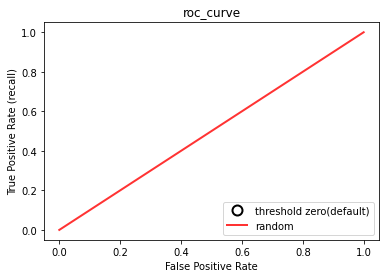

In [224]:
from sklearn.metrics import roc_curve
y_test = [1 if i=='SMOKER' else 0 for i in y_test]
y_pred = [1 if i=='SMOKER' else 0 for i in y_pred]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label="SMOKER")
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# find threshold closest to zero:
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], "o", markersize=10, 
 label="threshold zero(default)", fillstyle="none", c="k", mew=2)
plt.plot([0,1], linestyle='-', lw=2, color='r', label='random', alpha=0.8)
plt.legend(loc=4)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (recall)")
plt.title("roc_curve");
from sklearn.metrics import auc
print("AUC score is: " , auc(fpr, tpr));

In [225]:
# DEBUGGING
df_debug = pd.DataFrame({'Text': x_test, 'Labels': y_test, 'Predicted':y_pred})
df_debug.head()

,Text,Labels,Predicted
0,\n#####\nhlgmc\n#####\n#####\n##/##/#### ##:##...,0,0
1,\n#####\ncmc\n#####\n3/##/#### ##:##:## am\nme...,0,0
2,\n#####\nbh\n#####\n#####\n##/##/#### ##:##:##...,0,0
3,\n#####\nnvh\n#####\n3/##/#### ##:##:## am\ndi...,0,0
4,\n#####\nctmc\n#####\n#####\n1/##/#### ##:##:#...,0,0


In [226]:
df_debug.Predicted.value_counts()

0    146
Name: Predicted, dtype: int64